**TODO**
1. Написать когда по 4 сигналам прогнозируем 5ый. 

In [1]:
import torch
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from pandas.plotting import register_matplotlib_converters
from torch import nn, optim
from importlib import reload

import pickle
from zipfile import ZipFile



device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)


import random
def set_determenistic(seed=777,precision=10):
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.set_printoptions(precision=precision)

set_determenistic()

cuda:0


# Download dataset and preprocessing

In [2]:
if os.path.exists('./data'):
    pass
else:
    os.mkdir('./data')
# ===============================================
if os.path.exists('./data/household_power_consumption.txt'):
    pass
else:
    os.system('curl  https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip --output ./data/household_power_consumption.zip')
    with ZipFile('./data/household_power_consumption.zip', 'r') as zipObj:
        zipObj.extractall('./data')
    os.remove('./data/household_power_consumption.zip')
# =============================================== 


In [3]:
%%time
if os.path.exists('./data/df.pcl'):
    with open('./data/df.pcl', 'rb') as f:
        df = pickle.load(f)
else:
    data_path = './data/'
    df = pd.read_csv(data_path+'household_power_consumption.txt',sep=';')
    df['Datetime'] = df['Date']+ ' ' + df['Time']
    df.index = pd.to_datetime(df['Datetime'])
    df = df.drop(['Date','Time','Datetime'],1)

    for col in df:
        df[col]=pd.to_numeric(df[col], errors='coerce')
    df = df.dropna()
    df.head(3)
    dff  = df.copy()
    df= dff[:1495]
    with open('./data/df.pcl', 'wb') as f:
        pickle.dump(df, f)

Wall time: 1.47 ms


In [4]:
# import sys
# sys.path.insert(1, './DL_anomaly_detection')
from tsad import main, models #,stastics,generate_residuals,
# src = reload(src)
models = reload(models)
# generate_residuals = reload(generate_residuals)

# stastics = reload(stastics)
main = reload(main)

In [5]:
in_features = df.shape[1]

from tsad import  models
lstm = models.SimpleLSTM(in_features=in_features,n_hidden=in_features,n_layers=1) 
deepLstm = models.SimpleLSTM(in_features=in_features,n_hidden=in_features,n_layers=2) 
blstm = models.SimpleLSTM(in_features=in_features,n_hidden=in_features,n_layers=1,bidirectional=True)

lstmAe = models.SimpleLSTM(in_features=in_features,n_hidden=int(in_features*3/4),n_layers=1)




C:\Users\kompn\anaconda3\lib\site-packages\torch\nn\modules\rnn.py:50: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [6]:
dfs = df.copy()
a = main.DL_AD()

In [7]:
# model = SimpleLSTM(dfs.shape[1],dfs.shape[1],2,bidirectional=True).to(device)

Epoch: 01
	Train Loss: 0.194
	 Val. Loss: 0.239 
Epoch: 02
	Train Loss: 0.173
	 Val. Loss: 0.214 
Epoch: 03
	Train Loss: 0.156
	 Val. Loss: 0.195 
Epoch: 04
	Train Loss: 0.143
	 Val. Loss: 0.179 
Epoch: 05
	Train Loss: 0.132
	 Val. Loss: 0.165 
Epoch: 06
	Train Loss: 0.122
	 Val. Loss: 0.152 
Epoch: 07
	Train Loss: 0.112
	 Val. Loss: 0.139 
Epoch: 08
	Train Loss: 0.103
	 Val. Loss: 0.126 

Test Loss: 0.127


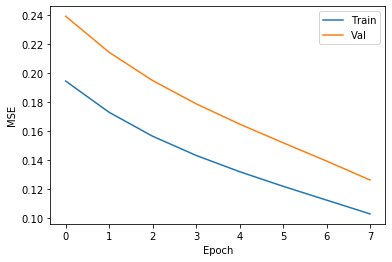

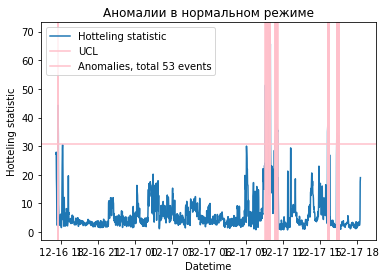

In [8]:
dd = a.fit(dfs,n_epochs=8,model=lstmAe,points_ahead=1)

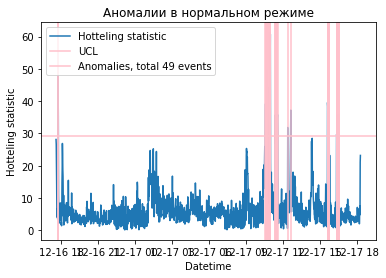

In [9]:
b= a.predict_anomaly(dfs)

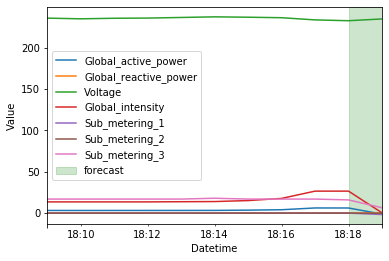

In [10]:
b= a.forecast(dfs)